In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Fortnite Statistics.csv to Fortnite Statistics (2).csv


In [ ]:
import pandas as pd

# Load file
df = pd.read_csv('Fortnite Statistics.csv')

# Clean 'Accuracy' (remove % and convert to float)
df['Accuracy'] = df['Accuracy'].str.replace('%', '', regex=False).astype(float)

# Check structure
print(df.columns.tolist())
df.head()

['Date', 'Time of Day', 'Placed', 'Mental State', 'Eliminations', 'Assists', 'Revives', 'Accuracy', 'Hits', 'Head Shots', 'Distance Traveled', 'Materials Gathered', 'Materials Used', 'Damage Taken', 'Damage to Players', 'Damage to Structures']


,Date,Time of Day,Placed,Mental State,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
0,4/10,6:00 PM,27,sober,2,0,0,23.0,14,2,271.08,20,20,272,331,621
1,4/10,6:00 PM,45,sober,1,2,0,30.0,19,1,396.73,123,30,247,444,998
2,4/10,6:00 PM,38,high,3,0,0,30.0,32,1,607.80,71,60,176,322,1109
3,4/10,7:00 PM,30,high,1,3,0,18.0,19,1,714.16,244,10,238,330,4726
4,4/10,7:00 PM,16,high,3,1,1,58.0,42,18,1140.00,584,150,365,668,2070


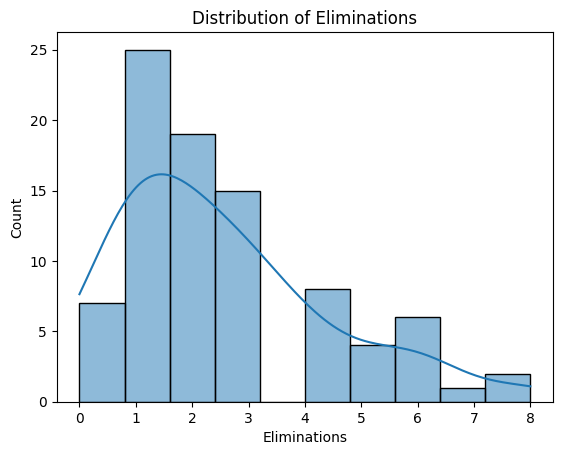

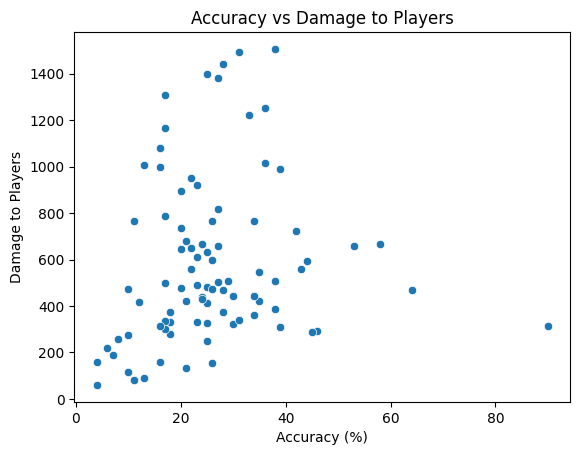

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of Eliminations
sns.histplot(df['Eliminations'], kde=True, bins=10)
plt.title('Distribution of Eliminations')
plt.xlabel('Eliminations')
plt.show()

# Scatter Plot: Accuracy vs Damage to Players
sns.scatterplot(data=df, x='Accuracy', y='Damage to Players')
plt.title('Accuracy vs Damage to Players')
plt.xlabel('Accuracy (%)')
plt.ylabel('Damage to Players')
plt.show()

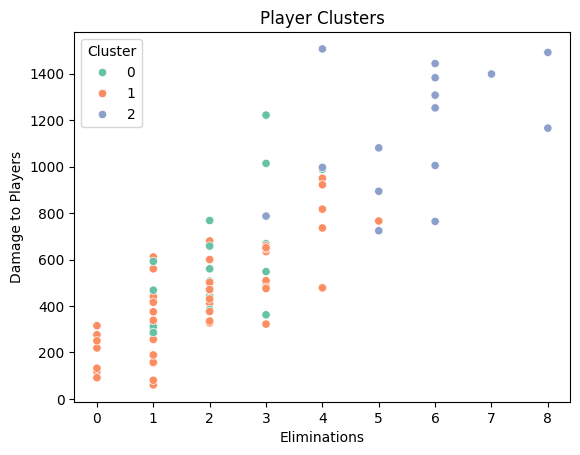

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Features for clustering
features = df[['Eliminations', 'Accuracy', 'Damage to Players', 'Distance Traveled']]

# Normalize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters
sns.scatterplot(data=df, x='Eliminations', y='Damage to Players', hue='Cluster', palette='Set2')
plt.title('Player Clusters')
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.93      0.88        15
           1       0.90      0.75      0.82        12

    accuracy                           0.85        27
   macro avg       0.86      0.84      0.85        27
weighted avg       0.86      0.85      0.85        27



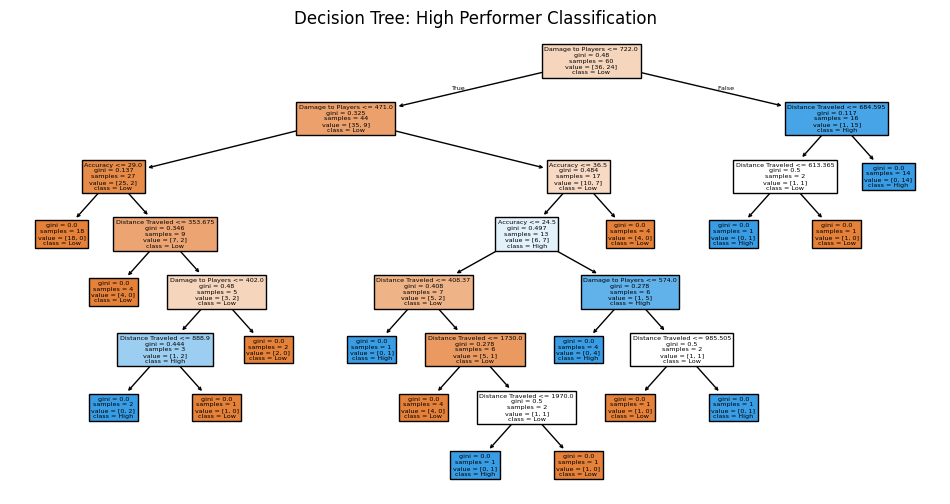

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create binary target: High performers = Eliminations >= 3
df['High_Performer'] = (df['Eliminations'] >= 3).astype(int)

# Features for prediction
X = df[['Accuracy', 'Damage to Players', 'Distance Traveled']]
y = df['High_Performer']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot tree
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X.columns, class_names=['Low', 'High'], filled=True)
plt.title('Decision Tree: High Performer Classification')
plt.show()


In [ ]:
# Example: Find players who took lots of damage but had few eliminations
struggling_players = df[(df['Eliminations'] < 2) & (df['Damage Taken'] > 300)]

print(f"{len(struggling_players)} players took high damage but got few eliminations.")
print("👉 Consider adjusting difficulty or giving tips at early levels.")

4 players took high damage but got few eliminations.
👉 Consider adjusting difficulty or giving tips at early levels.


In [ ]:
# Save with clusters and labels
df.to_csv('analyzed_game_data.csv', index=False)

# Download
files.download('analyzed_game_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>